## Load data

In [11]:
import csv
import numpy as np

class Repository(object):
    def __init__(self,fileName):
        self.fileName = fileName
    def  loadData(self,inputColumn,outputColumn):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                columns = line
            else:
                data.append(line)
            noLines += 1
        
        inputColumnIndex = columns.index(inputColumn)
        outputColumnIndex = columns.index(outputColumn)
    
        inputData = []
        outputData = []
        for j in range(len(data)):
            inputData.append(float(data[j][inputColumnIndex]))
            outputData.append(float(data[j][outputColumnIndex]))
        
        file.close()
        
        return inputData,outputData

In [12]:
filename = "data.csv"
repository = Repository(filename)
inputColumn = 'Economy..GDP.per.Capita.'
outputColumn = 'Happiness.Score'
inputDataResult,outputDataResult = repository.loadData(inputColumn, outputColumn)
print('inputs for column '+inputColumn[:5] +'is: \n'+str(inputDataResult))
print('outputs for column '+outputColumn[:5] +'is: \n'+str(outputDataResult))

inputs for column Econois: 
[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.09186446666718, 1.26074862480164

### defining function for plotting the inputData and the outputData

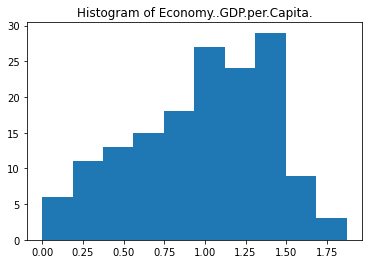

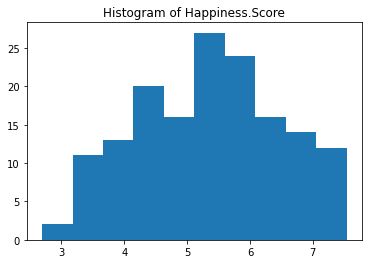

In [13]:
import matplotlib.pyplot as plt 

def plotDataHistogram(x, columnName):
    plt.hist(x, 10)
    plt.title('Histogram of ' + columnName)
    plt.show()
    
plotDataHistogram(inputDataResult,inputColumn)
plotDataHistogram(outputDataResult,outputColumn)

### defining plotting for the training data inputs

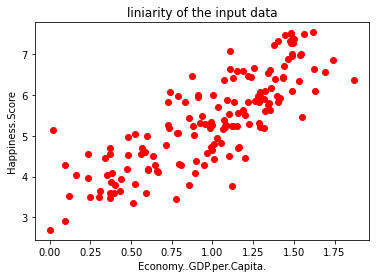

In [14]:
plt.title('liniarity of the input data')
plt.plot(inputDataResult,outputDataResult,'ro')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.show()

### separating training data from test data 20%-80%

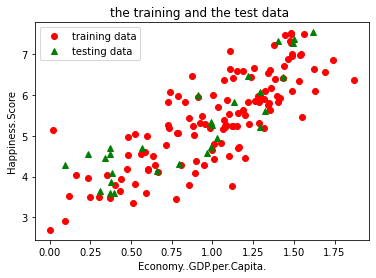

[1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.47920441627502, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 0.872001945972443, 1.23374843597412, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 0.737299203872681, 1.00082039833069, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.09186446666718, 1.26074862480164, 1.40167844295502, 0.728870630264282, 1.21768391132355, 0.833756566047668, 1.28455626964569, 1.3469113111496, 1.3412059545517, 1.03522527217865, 1.18939554691315, 1.3559380

In [15]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputDataResult))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputDataResult)))

inputTest = []
outputTest = []
inputTraining = []
outputTraining = []
for i in range (0,len(inputDataResult)):
    if i in testDataIndexes :
        inputTest.append(inputDataResult[i])
        outputTest.append(outputDataResult[i])
    else:
        inputTraining.append(inputDataResult[i])
        outputTraining.append(outputDataResult[i])

# plotting differently the training and the test data 
plt.title('the training and the test data ')
plt.plot(inputTraining, outputTraining, 'ro', label = 'training data')
plt.plot(inputTest, outputTest, 'g^', label = 'testing data')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.legend()
plt.show()

print(inputTraining)
print(inputTest)

## Batch Gradient Descent Univariate Regression Class

In [16]:
import random

class BGDUnivariateregression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []
        self.w0 = 0.0
        self.w1 = 0.0
        # self.w0 = random.random()
        # self.w1 = random.random()
        
    def computeCostFunctionPerEpoch(self,noSamples,w0,w1,inputs,outputs):
        # define the cost function that is calculated for each epoch of batch GD
        sum =0 
        for i in range(0,noSamples):
            computedValue = w0 + w1 * inputs[i]
            sum += (computedValue - outputs[i]) ** 2
        return 1/2/noSamples * sum

    def computeGrad0PerEpoch(self,inputs,outputs,noSamples):
        sum = 0
        for samp in range(0,noSamples):
            guess = self.w0 + self.w1 * inputs[samp]
            sum += guess - outputs[samp]
        return 1.0/noSamples * sum
    def computeGrad1PerEpoch(self,inputs,outputs,noSamples):
        sum = 0
        for samp in range(0,noSamples):
            guess = self.w0 + self.w1 * inputs[samp]
            sum += inputs[samp] * (guess- outputs[samp])
        return 1.0/noSamples * sum

    # batch Gradient Descent
    def fit(self, inputsData, outputsData, learningRate = 0.001, noEpochs = 1000):
        for epoch in range(noEpochs):
            grad0 = self.computeGrad0PerEpoch(inputsData,outputsData,len(inputsData))
            grad1 = self.computeGrad1PerEpoch(inputsData,outputsData,len(inputsData))
            self.w0 = self.w0 - learningRate * grad0
            self.w1 = self.w1 - learningRate * grad1
           
        return self.w0,self.w1

    def predict(self, input):
        if isinstance(input[0], list):
            return [self.w0 + self.w1 * dt[0] for dt in input]
        else:
            return [self.w0 + self.w1 * dt for dt in input]

**Linear regression solve**

In [17]:
regressor = BGDUnivariateregression()
regressor.fit(inputTraining,outputTraining,0.1,1500)
print('The result function of linear regression batch GD is:\n')
print('f(x) = '+str(regressor.w0)+' + '+str(regressor.w1)+' * x')


The result function of linear regression batch GD is:

f(x) = 3.1711808755550943 + 2.1892549426726666 * x


### plotting the linear learnt model from the training data

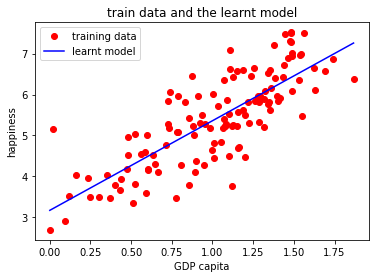

In [18]:
noOfPoints = 1000
xref = []
val = min(inputTraining)
step = (max(inputTraining) - min(inputTraining)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [regressor.w0 + regressor.w1 * el for el in xref] 

plt.plot(inputTraining, outputTraining, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

## test the learnt model on test data set

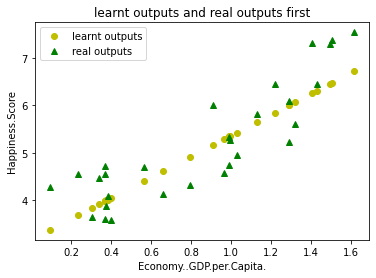

In [19]:

computedTestOutputs = regressor.predict([[x] for x in inputTest])


plt.plot(inputTest, computedTestOutputs, 'yo', label = 'learnt outputs')  #computed test data are plotted yellow red and circle sign
plt.plot(inputTest, outputTest, 'g^', label = 'real outputs')  #real test data are plotted by green triangles
plt.title('learnt outputs and real outputs first')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.legend()
plt.show()

### error calculation

In [20]:
from sklearn.metrics import mean_squared_error


error =sum((r - c) ** 2 for r, c in zip(outputTest, computedTestOutputs)) / len(outputTest)
errorTool = mean_squared_error(outputTest, computedTestOutputs)

print('prediction error ', error)
print('prediction error (tool):  ', errorTool)

prediction error  0.35096566925238226
prediction error (tool):   0.35096566925238226
